In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
ncl1 = 'Cs137'   #edit here!!!!!!
ncl1_mean_eng = 662   #edit here!!!!!!

In [3]:
ncl2 = 'Co60'   #edit here!!!!!!
ncl2_mean_eng = 1173   #edit here!!!!!!

In [4]:
ncl3 = 'Co60'   #edit here!!!!!!
ncl3_mean_eng = 1332   #edit here!!!!!!

In [5]:
num_ncls = 3

In [6]:
################################################

In [12]:
# input th data for caribration
direction = 'up'   #edit here!!!!!!
date = '01261116'   #edit here!!!!!!
nucleon = 'Co60'   #edit here!!!!!!
mean_eng = 1173   #edit here!!!!!!
carib_path = r'C:\Users\kyoto\WaveDump\caribration'

path = os.path.join(carib_path, direction, nucleon + '_' + date + direction + '0.txt')
print(path)

C:\Users\kyoto\WaveDump\caribration\up\Co60_01261116up0.txt


In [13]:
with open(path) as f:
    lines = f.readlines()
    num = len(lines)/1023
    print(num)

19787.0


(500.0, 570.0)

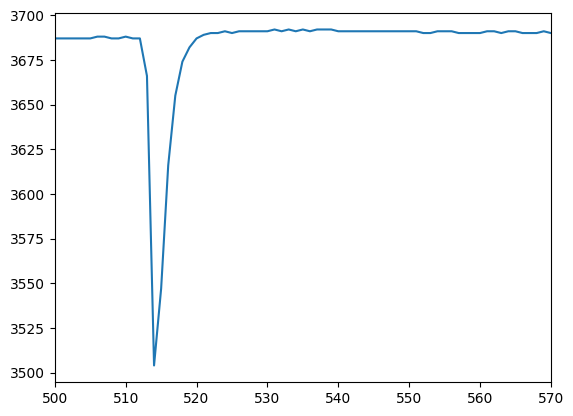

In [15]:
plt.plot([int(line) for line in lines[:1023]])
plt.xlim([500, 570]) #ADC trigger is at 512

In [16]:
test = np.array([int(line) for line in lines[:1023]])
test.mean()

3687.1006842619745

(500.0, 570.0)

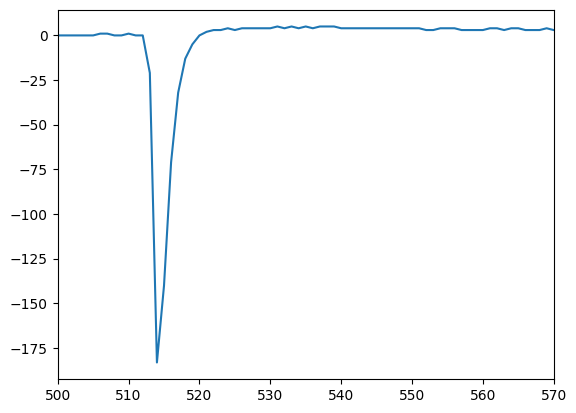

In [17]:
plt.plot(test - test[0:500].mean())
subtracted = test - test[0:500].mean()
subtracted[500:600].sum()
plt.xlim([500, 570])

In [18]:
N_points = 1023
data = np.array([int(line) for line in lines])
length = len(data)//N_points
data_res = data[:length * N_points].reshape(-1,N_points)

def intg(d):
    return (d[510:525] - d[:500].mean()).sum()

array = [-intg(d) for d in data_res]
hist, edges = np.histogram(array, bins=1000, range=(0,1000))
del data
del data_res

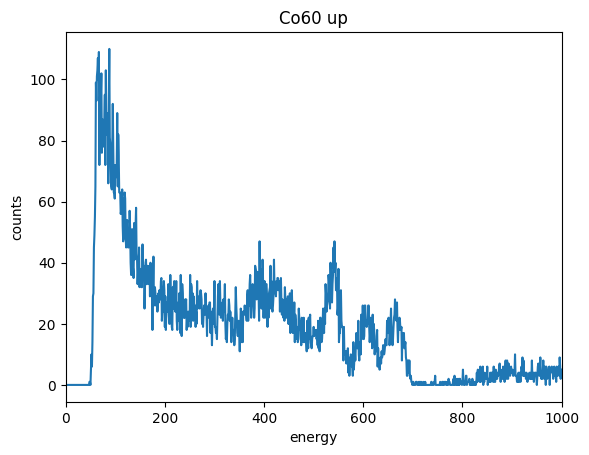

In [19]:
plt.plot(edges[:-1], hist)
plt.xlim([0, 1000])
plt.xlabel('energy')
plt.ylabel('counts')
#plt.yscale('log')
plt.title(nucleon + ' ' + direction)
save_path = carib_path + '/' + direction + '/' + nucleon + '_' + direction
plt.savefig(save_path)
np.save(save_path + 'hist', hist)

Text(0.5, 1.0, 'Co60 up')

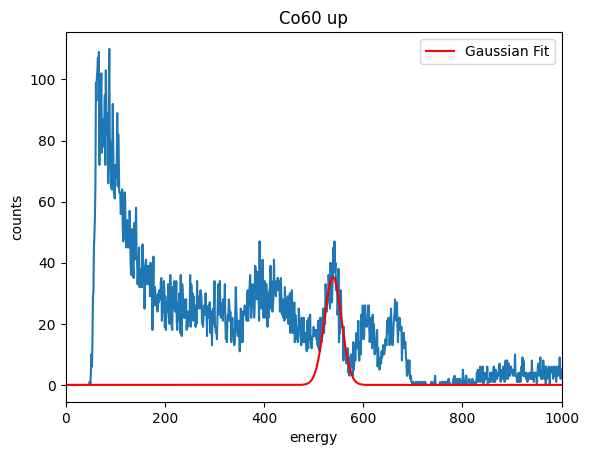

In [23]:
from scipy.optimize import curve_fit

plt.plot(edges[:-1], hist)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

fit_range_mask = (bin_centers >= 520) & (bin_centers <= 580)   #edit here!!!!!!
fit_range_bin_centers = bin_centers[fit_range_mask]
fit_range_hist_data = hist[fit_range_mask]

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)

initial_params = [50, 550, 5]   #edit here!!!!!! [amplitude, center, stddev]

params, covariance = curve_fit(gaussian, fit_range_bin_centers, fit_range_hist_data, p0=initial_params)
amplitude, mean, stddev = params

plt.plot(bin_centers, gaussian(bin_centers, amplitude, mean, stddev), 'r-', label='Gaussian Fit')
plt.xlim([0, 1000])
plt.xlabel('energy')
plt.ylabel('counts')
plt.legend()
plt.title(nucleon + ' ' + direction)

In [24]:
print(params)
#amplitude mean stddev

[ 35.27089425 538.94920242  17.36890371]


In [25]:
params_path = os.path.join(carib_path, direction, nucleon + '_' + str(mean_eng) + 'keV_' + direction + '_params.npy')
print(params_path)
np.save(params_path, params)

C:\Users\kyoto\WaveDump\caribration\up\Co60_1173keV_up_params.npy


In [19]:
####################################

In [26]:
ncl1_params_path = os.path.join(carib_path, direction, ncl1 + '_' + str(ncl1_mean_eng) + 'keV_' + direction + '_params.npy')
print(ncl1_params_path)
ncl1_mean = np.load(ncl1_params_path)[1] #0, 1, 2, ...
print(ncl1_mean)

C:\Users\kyoto\WaveDump\caribration\up\Cs137_662keV_up_params.npy
305.1714145376183


In [27]:
ncl2_params_path = os.path.join(carib_path, direction, ncl2 + '_' + str(ncl2_mean_eng) + 'keV_' + direction + '_params.npy')
print(ncl2_params_path)
ncl2_mean = np.load(ncl2_params_path)[1] #0, 1, 2, ...
print(ncl2_mean)

C:\Users\kyoto\WaveDump\caribration\up\Co60_1173keV_up_params.npy
538.9492024169714


In [28]:
ncl3_params_path = os.path.join(carib_path, direction, ncl3 + '_' + str(ncl3_mean_eng) + 'keV_' + direction + '_params.npy')
print(ncl3_params_path)
ncl3_mean = np.load(ncl3_params_path)[1] #0, 1, 2, ...
print(ncl3_mean)

C:\Users\kyoto\WaveDump\caribration\up\Co60_1332keV_up_params.npy


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kyoto\\WaveDump\\caribration\\up\\Co60_1332keV_up_params.npy'

In [132]:
# for loop in range(num_ncls):
#     def ncl_params_path(loop):
#         return (os.path.join(carib_path, direction, ncl + str(loop) + '_' + str(ncl1_mean_eng) + 'keV_' + direction + '_params.npy'))

#     def ncl_mean(loop):
#         return np.load(ncl1_params_path)[1] #0, 1, 2, ...
    
#     print(ncl_mean)

y = 2.17x + 0.05


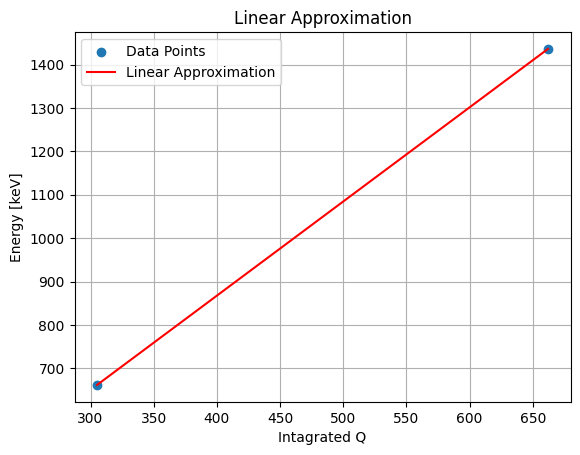

In [29]:
def linapp(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return m, c

#y = [511, 662, 1275]    # Energy [keV]

xarray = [ncl1_mean, 662]    # ADC channel
yarray = [ncl1_mean_eng, 1436]   # Energy [keV]

slope, intercept = linapp(xarray, yarray)
print(f"y = {slope:.2f}x + {intercept:.2f}") #傾きが1ADCカウントが何keVに対応するか

plt.scatter(xarray, yarray, label='Data Points')
plt.plot(xarray, [slope * x + intercept for x in xarray], 'r', label='Linear Approximation')
plt.xlabel('Intagrated Q')
plt.ylabel('Energy [keV]')
plt.title('Linear Approximation')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
linapp_path = os.path.join(carib_path, direction, direction + '_linapp_params.npy')
print(linapp_path)

C:\Users\kyoto\WaveDump\caribration\up\up_linapp_params.npy


In [25]:
np.save(linapp_path, [slope, intercept])